In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1=open('/content/drive/MyDrive/RegressionDataTuned.csv')
file2=open('/content/drive/MyDrive/RegressionFullDataSet.csv')

In [3]:
data_class=pd.read_csv(file1)


In [4]:
data_full=pd.read_csv(file2)


In [ ]:
data_full=data_full.transpose()

In [5]:
data_full

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Dest,Unnamed: 0_y,airport_x,date_x,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1.1,airport_y,date_y,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y,TargetDelay
0,0,6,356840,2016-01-01,1,2016,1,1,745.0,1.0,700,40.0,14747,12889,1007.0,900,1.0,37.0,SEA,LAS,9,LAS,2016-01-01,8,241,113,0.0,10,1029,0,13,13,29,21,56,900,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700,1
1,1,7,145879,2016-01-01,1,2016,1,1,759.0,1.0,700,35.0,14747,14771,1010.0,900,1.0,24.0,SEA,SFO,9,SFO,2016-01-01,19,72,113,0.0,10,1023,0,25,30,35,25,70,900,7,SEA,2016-01-01,7,107,113,0.0,10,1030,0,23,8,34,29,66,700,1
2,2,12,37814,2016-01-01,1,2016,1,1,1400.0,1.0,1300,60.0,13303,11057,1559.0,1500,1.0,51.0,MIA,CLT,15,CLT,2016-01-01,8,298,122,0.0,10,1022,100,42,10,51,49,73,1500,13,MIA,2016-01-01,11,124,122,0.0,10,1020,65,73,13,81,79,81,1300,1
3,3,13,887,2016-01-01,1,2016,1,1,1408.0,1.0,1300,38.0,13204,12478,1628.0,1600,1.0,25.0,MCO,JFK,16,JFK,2016-01-01,22,255,113,0.0,10,1015,0,32,26,41,32,74,1600,13,MCO,2016-01-01,8,227,122,0.1,8,1019,79,72,10,79,78,83,1300,1
4,4,36,221121,2016-01-01,1,2016,1,1,1342.0,1.0,1200,61.0,13930,14771,1553.0,1500,1.0,22.0,ORD,SFO,15,SFO,2016-01-01,18,67,113,0.0,10,1022,0,28,21,47,41,50,1500,12,ORD,2016-01-01,22,253,122,0.0,10,1024,100,22,26,25,13,88,1200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379361,379361,1815378,414558,2017-09-08,3,2017,9,8,1827.0,1.0,1800,32.0,13303,10397,2049.0,2000,1.0,49.0,MIA,ATL,188,ATL,2017-09-08,11,80,113,0.0,10,1019,11,59,13,77,77,55,2000,186,MIA,2017-09-08,30,51,122,0.0,10,1009,84,75,36,86,86,70,1800,1
379362,379362,1815379,413458,2017-09-08,3,2017,9,8,927.0,1.0,600,207.0,13303,10397,1228.0,700,1.0,279.0,MIA,ATL,175,ATL,2017-09-08,7,31,113,0.0,10,1021,0,60,7,65,65,83,700,174,MIA,2017-09-08,14,67,116,0.0,10,1012,40,76,19,82,82,84,600,1
379363,379363,1815385,441434,2017-09-03,3,2017,9,3,50.0,1.0,2300,95.0,12478,12892,324.0,200,1.0,68.0,JFK,LAX,50,LAX,2017-09-03,3,42,119,0.0,10,1011,21,68,6,83,83,61,200,71,JFK,2017-09-03,21,273,113,0.0,10,1013,0,63,30,68,68,86,2300,1
379364,379364,1815395,449441,2017-09-13,3,2017,9,13,2345.0,1.0,2200,60.0,12478,12892,229.0,200,1.0,33.0,JFK,LAX,290,LAX,2017-09-13,9,260,143,0.0,10,1012,75,64,11,66,66,93,200,310,JFK,2017-09-13,11,217,143,0.0,10,1012,77,69,15,71,71,93,2200,1


In [6]:
X1=data_class.drop(["ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
             "DepDel15",
                 "Unnamed: 0_x",
                 "Unnamed: 0_y",
                 "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",
           "Unnamed: 0",'Unnamed: 0.1.1'],axis=1)

In [7]:
X2=data_full.drop(["ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
             "DepDel15",
                 "Unnamed: 0_x",
                 "Unnamed: 0_y",
                 "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",
           "Unnamed: 0",'Unnamed: 0.1.1'],axis=1)

In [8]:
Y2=data_full.ArrDelayMinutes

In [9]:
Y1=data_class.ArrDelayMinutes

In [10]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.25) 

In [11]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.25) 

In [12]:
legr=LinearRegression().fit(X_train1,Y_train1)

In [23]:
legrF=LinearRegression().fit(x_train2,y_train2)

In [13]:
y_predlegr=legr.predict(X_test1)

In [24]:
y_predlegrF=legrF.predict(x_test2)

In [20]:
print("Classifier data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test1, y_predlegr)))
print("mean_absolute_error  " , mean_absolute_error(Y_test1, y_predlegr))
print("R2score    " , r2_score(Y_test1,y_predlegr))

Classifier data
mean_squared_error    17.956537656363075
mean_absolute_error   12.778710707339396
R2score     0.9527933633545148


In [25]:
print("Default Data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(y_test2, y_predlegrF)))
print("mean_absolute_error  " , mean_absolute_error(y_test2, y_predlegrF))
print("R2score    " , r2_score(y_test2,y_predlegrF))

Default Data
mean_squared_error    19.81930429662002
mean_absolute_error   14.453310547586781
R2score     0.9234256654148817


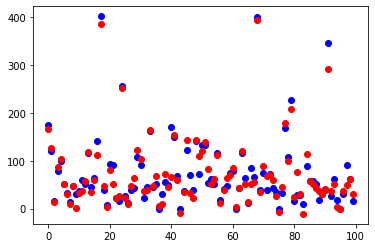

In [48]:
    plt.scatter(range(len(Y_test1[:100])), Y_test1[:100], color='blue')
    plt.scatter(range(len(y_predlegr[:100])), y_predlegr[:100], color='red')

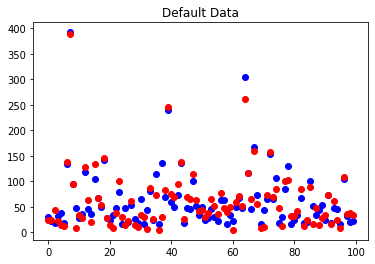

In [50]:
plt.title("Default Data")
plt.scatter(range(len(y_test2[:100])), y_test2[:100], color='blue')
plt.scatter(range(len(y_predlegrF[:100])), y_predlegrF[:100], color='red')

In [51]:
ex=ExtraTreesRegressor().fit(X_train1,Y_train1)

In [54]:
exF=ExtraTreesRegressor().fit(x_train2,y_train2)

In [52]:
y_predex=ex.predict(X_test1)

In [55]:
y_predexF=exF.predict(x_test2)

In [53]:
print("Classifier data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test1, y_predex)))
print("mean_absolute_error  " , mean_absolute_error(Y_test1, y_predex))
print("R2score    " , r2_score(Y_test1,y_predex))

Classifier data
mean_squared_error    17.27652038551669
mean_absolute_error   11.809207158568286
R2score     0.9563011093709415


In [56]:
print("Default data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(y_test2, y_predexF)))
print("mean_absolute_error  " , mean_absolute_error(y_test2, y_predexF))
print("R2score    " , r2_score(y_test2,y_predexF))

Default data
mean_squared_error    16.368263609342
mean_absolute_error   10.901090972354021
R2score     0.947771008311642


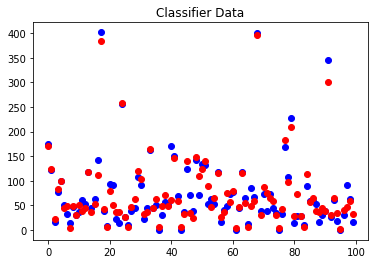

In [57]:
plt.title("Classifier Data")
plt.scatter(range(len(Y_test1[:100])), Y_test1[:100], color='blue')
plt.scatter(range(len(y_predex[:100])), y_predex[:100], color='red')


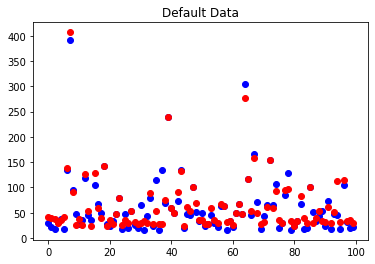

In [58]:
plt.title("Default Data")
plt.scatter(range(len(y_test2[:100])), y_test2[:100], color='blue')
plt.scatter(range(len(y_predexF[:100])), y_predexF[:100], color='red')

In [22]:
xgbb=xgb.XGBRegressor().fit(X_train1,Y_train1)

[14:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
xgbbF=xgb.XGBRegressor().fit(x_train2,y_train2)

[14:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
y_predxg=xgbb.predict(X_test1)

In [29]:
y_predxgF=xgbbF.predict(x_test2)

In [31]:
print("Classifier data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test1, y_predxg)))
print("mean_absolute_error  " , mean_absolute_error(Y_test1, y_predxg))
print("R2score    " , r2_score(Y_test1,y_predxg))

Classifier data
mean_squared_error    17.109083800508078
mean_absolute_error   11.524018809054821
R2score     0.9571440264921973


In [32]:
print("Default Data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(y_test2, y_predxgF)))
print("mean_absolute_error  " , mean_absolute_error(y_test2, y_predxgF))
print("R2score    " , r2_score(y_test2,y_predxgF))

Default Data
mean_squared_error    17.021674201901398
mean_absolute_error   11.683083844510168
R2score     0.9435178827814792


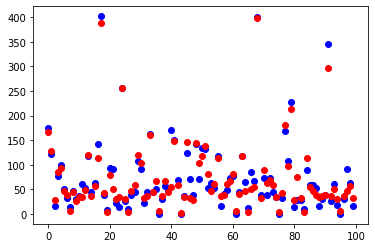

In [46]:
    plt.scatter(range(len(Y_test1[:100])), Y_test1[:100], color='blue')
    plt.scatter(range(len(y_predxg[:100])), y_predxg[:100], color='red')

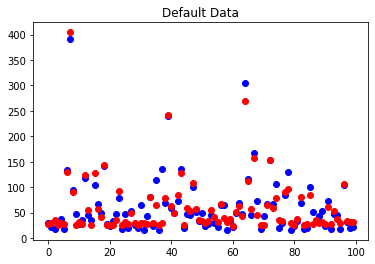

In [47]:
plt.title("Default Data")
plt.scatter(range(len(y_test2[:100])), y_test2[:100], color='blue')
plt.scatter(range(len(y_predxgF[:100])), y_predxgF[:100], color='red')

In [33]:
rf=RandomForestRegressor(n_estimators=100).fit(X_train1,Y_train1)

In [36]:
rfF=RandomForestRegressor(n_estimators=100).fit(x_train2,y_train2)

In [34]:
y_predrf=rf.predict(X_test1)

In [37]:
y_predrfF=rfF.predict(x_test2)

In [35]:
print("Classifier Data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test1, y_predrf)))
print("mean_absolute_error  " , mean_absolute_error(Y_test1, y_predrf))
print("R2score    " , r2_score(Y_test1,y_predrf))

Classifier Data
mean_squared_error    17.42731769682424
mean_absolute_error   11.780643067815008
R2score     0.9555349326288225


In [38]:
print("Default Data")
print("mean_squared_error   " , np.sqrt(mean_squared_error(y_test2, y_predrfF)))
print("mean_absolute_error  " , mean_absolute_error(y_test2, y_predrfF))
print("R2score    " , r2_score(y_test2,y_predrfF))

Default Data
mean_squared_error    16.827070849456067
mean_absolute_error   11.7918562692237
R2score     0.9448019841523083


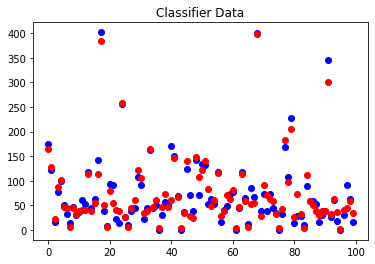

In [43]:
    plt.title("Classifier Data")
    plt.scatter(range(len(Y_test1[:100])), Y_test1[:100], color='blue')
    plt.scatter(range(len(y_predrf[:100])), y_predrf[:100], color='red')

  

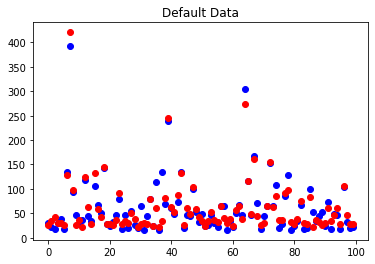

In [59]:
plt.title("Default Data")
plt.scatter(range(len(y_test2[:100])), y_test2[:100], color='blue')
plt.scatter(range(len(y_predrfF[:100])), y_predrfF[:100], color='red')

In [ ]:
Y_test[:10]

47749     24.0
6931      37.0
37610     12.0
36516     99.0
3477      50.0
20642     55.0
12882     15.0
56443     77.0
44091     59.0
23862    239.0
Name: ArrDelayMinutes, dtype: float64

In [ ]:
y_predlegr[:10]

array([ 15.80731489,  35.7616594 ,   3.95403593, 103.26536127,
        42.04896131,  66.17815932,  -0.34701847,  69.7693388 ,
        79.53207811, 243.77191535])